### 인천 데이터

In [4]:
import pandas as pd
import glob
from datetime import datetime
import numpy as np

# 한국의 공휴일, version : 1.1.1
from workalendar.asia import SouthKorea 

holidays = pd.concat([pd.Series(np.array(SouthKorea().holidays(2018))[:, 0]), pd.Series(np.array(SouthKorea().holidays(2017))[:, 0])]).reset_index(drop=True)

In [103]:
# 2017년 ~ 2018년 data 취합

# path_list = [r'data/경진대회_나주시_전력사용량 DATA1', r'data/경진대회_나주시_전력사용량 DATA2', r'data/경진대회_나주시_전력사용량 DATA3']
path_list = [r'data/경진대회_인천시_전력사용량 DATA']
li = []
for path in path_list:
    all_files = glob.glob(path + "/*.csv")
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0, encoding='euc-kr')
        li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [104]:
frame.tail()

,시/도,시/군/구,읍/면/동,계약종별,날짜,시간,호수,전력사용
4834156,인천광역시,중구,AA78동,211 일반용(갑)저압,20171031,19,11,42.227
4834157,인천광역시,중구,AA78동,211 일반용(갑)저압,20171031,20,11,43.458
4834158,인천광역시,중구,AA78동,211 일반용(갑)저압,20171031,21,11,31.574
4834159,인천광역시,중구,AA78동,211 일반용(갑)저압,20171031,22,11,42.109
4834160,인천광역시,중구,AA78동,211 일반용(갑)저압,20171031,23,11,44.247


In [105]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4834161 entries, 0 to 4834160
Data columns (total 8 columns):
시/도      object
시/군/구    object
읍/면/동    object
계약종별     object
날짜       int64
시간       int64
호수       int64
전력사용     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 295.1+ MB


In [106]:
frame['날짜'] = pd.to_datetime(frame['날짜'], format="%Y%m%d")
frame['시간'] = frame['시간'].astype(str)

In [107]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4834161 entries, 0 to 4834160
Data columns (total 8 columns):
시/도      object
시/군/구    object
읍/면/동    object
계약종별     object
날짜       datetime64[ns]
시간       object
호수       int64
전력사용     float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 295.1+ MB


## 전처리
---

### 1. datetime으로 변환

#### **Issue** 

- 날짜 : `20170228`
- 시간 : `23`

> `20170301`+ `2300` 으로 변경하고 이를 `format = datetime64[ns]`으로 `datetime`이라는 새로운 column 생성 

In [108]:
# frame.loc[frame['시간'] == '2400', '날짜'] = frame['날짜'] + pd.DateOffset(days=1)
# frame['시간'] = frame['시간'].apply(lambda x : '0000' if '2400' in str(x) else str(x).zfill(4))
frame['datetime'] = pd.to_datetime(frame['날짜'].astype(str) + ' ' + frame['시간'].apply(lambda x: x[0:2]) + ':00')

In [109]:
frame.tail()

,시/도,시/군/구,읍/면/동,계약종별,날짜,시간,호수,전력사용,datetime
4834156,인천광역시,중구,AA78동,211 일반용(갑)저압,2017-10-31,19,11,42.227,2017-10-31 19:00:00
4834157,인천광역시,중구,AA78동,211 일반용(갑)저압,2017-10-31,20,11,43.458,2017-10-31 20:00:00
4834158,인천광역시,중구,AA78동,211 일반용(갑)저압,2017-10-31,21,11,31.574,2017-10-31 21:00:00
4834159,인천광역시,중구,AA78동,211 일반용(갑)저압,2017-10-31,22,11,42.109,2017-10-31 22:00:00
4834160,인천광역시,중구,AA78동,211 일반용(갑)저압,2017-10-31,23,11,44.247,2017-10-31 23:00:00


In [63]:
frame = frame.sort_values(by = 'datetime')

### 2. 고객 분류 I


In [110]:
print('--------시/도 구분---------------')
print(frame['시/도'].unique())
print('--------시/군/구 구분------------')
print(frame['시/군/구'].unique())
print('--------읍/면/동 구분------------')
print(frame['읍/면/동'].unique())
print('--------호수 구분------------')
print(frame['호수'].unique())
print('--------계약종별 구분------------')
print(frame['계약종별'].unique())

--------시/도 구분---------------
['인천광역시']
--------시/군/구 구분------------
['강화군' '계양구' '남동구' '동구' '미추홀구' '부평구' '서구' '연수구' '옹진군' '중구']
--------읍/면/동 구분------------
['AA9동' 'AA50동' 'AA51동' 'AA53동' 'AA12동' 'AA20동' 'AA30동' 'AA41동' 'AA42동'
 'AA43동' 'AA52동' 'AA54동' 'AA78동' 'AA88동' 'AA89동' 'AA90동' 'AA101동' 'AA3동'
 'AA4동' 'AA5동' 'AA6동' 'AA7동' 'AA13동' 'AA15동' 'AA16동' 'AA17동' 'AA18동'
 'AA19동' 'AA23동' 'AA25동' 'AA27동' 'AA32동' 'AA33동' 'AA34동' 'AA35동' 'AA36동'
 'AA37동' 'AA38동' 'AA55동' 'AA66동' 'AA91동' 'AA21동' 'AA31동' 'AA59동' 'AA65동'
 'AA95동' 'AA99동' 'AA100동' 'AA14동' 'AA29동' 'AA40동' 'AA67동' 'AA79동' 'AA93동'
 'AA98동' 'AA8동' 'AA44동' 'AA45동' 'AA48동' 'AA49동' 'AA74동' 'AA87동' 'AA96동'
 'AA1동' 'AA2동' 'AA10동' 'AA56동' 'AA69동' 'AA73동' 'AA57동' 'AA75동' 'AA77동'
 'AA97동' 'AA76동' 'AA11동' 'AA22동' 'AA24동' 'AA26동' 'AA28동' 'AA39동' 'AA46동'
 'AA47동' 'AA58동' 'AA60동' 'AA61동' 'AA62동' 'AA63동' 'AA64동' 'AA68동' 'AA70동'
 'AA71동' 'AA72동' 'AA80동' 'AA81동' 'AA82동' 'AA83동' 'AA84동' 'AA85동' 'AA86동'
 'AA92동' 'AA94동' 'AA105동' 'AA103동' 'AA104동' 'A

고유한 user를 찾기전에 `계약종별 구분`에서 숫자 **제거**하자.

In [111]:
def char_replace(x):
    char = x.split(' ')[1]
    return char

In [112]:
frame['계약종별'] = frame['계약종별'].apply(lambda x : char_replace(x))
frame.head()

,시/도,시/군/구,읍/면/동,계약종별,날짜,시간,호수,전력사용,datetime
0,인천광역시,강화군,AA9동,주택용전력,2018-10-01,0,6,1.692,2018-10-01 00:00:00
1,인천광역시,강화군,AA9동,주택용전력,2018-10-01,1,6,1.539,2018-10-01 01:00:00
2,인천광역시,강화군,AA9동,주택용전력,2018-10-01,2,6,1.464,2018-10-01 02:00:00
3,인천광역시,강화군,AA9동,주택용전력,2018-10-01,3,6,1.455,2018-10-01 03:00:00
4,인천광역시,강화군,AA9동,주택용전력,2018-10-01,4,6,1.542,2018-10-01 04:00:00


In [113]:
frame.groupby(['시/군/구','읍/면/동', '호수', '계약종별']).count().head(10)

시/도    날짜    시간  전력사용  datetime
시/군/구 읍/면/동 호수 계약종별                                      
강화군   AA40동 5  농사용(을)저압     1     1     1     1         1
               심야전력(갑)      4     4     4     4         4
               일반용(갑)저압   367   367   367   367       367
            6  농사용(을)저압    23    23    23    23        23
               심야전력(갑)      4     4     4     4         4
            7  농사용(을)저압  3533  3533  3533  3533      3533
               심야전력(갑)      9     9     9     9         9
            8  심야전력(갑)     28    28    28    28        28
               주택용전력        3     3     3     3         3
            9  심야전력(갑)   3511  3511  3511  3511      3511

In [114]:
frame.groupby(['시/도','시/군/구','읍/면/동', '호수', '계약종별']).count().index.levels

FrozenList([['인천광역시'], ['강화군', '계양구', '남동구', '동구', '미추홀구', '부평구', '서구', '연수구', '옹진군', '중구'], ['AA100동', 'AA101동', 'AA102동', 'AA103동', 'AA104동', 'AA105동', 'AA10동', 'AA11동', 'AA12동', 'AA13동', 'AA14동', 'AA15동', 'AA16동', 'AA17동', 'AA18동', 'AA19동', 'AA1동', 'AA20동', 'AA21동', 'AA22동', 'AA23동', 'AA24동', 'AA25동', 'AA26동', 'AA27동', 'AA28동', 'AA29동', 'AA2동', 'AA30동', 'AA31동', 'AA32동', 'AA33동', 'AA34동', 'AA35동', 'AA36동', 'AA37동', 'AA38동', 'AA39동', 'AA3동', 'AA40동', 'AA41동', 'AA42동', 'AA43동', 'AA44동', 'AA45동', 'AA46동', 'AA47동', 'AA48동', 'AA49동', 'AA4동', 'AA50동', 'AA51동', 'AA52동', 'AA53동', 'AA54동', 'AA55동', 'AA56동', 'AA57동', 'AA58동', 'AA59동', 'AA5동', 'AA60동', 'AA61동', 'AA62동', 'AA63동', 'AA64동', 'AA65동', 'AA66동', 'AA67동', 'AA68동', 'AA69동', 'AA6동', 'AA70동', 'AA71동', 'AA72동', 'AA73동', 'AA74동', 'AA75동', 'AA76동', 'AA77동', 'AA78동', 'AA79동', 'AA7동', 'AA80동', 'AA81동', 'AA82동', 'AA83동', 'AA84동', 'AA85동', 'AA86동', 'AA87동', 'AA88동', 'AA89동', 'AA8동', 'AA90동', 'AA91동', 'AA92동', 'AA93동', 'AA94동', 'AA95동', ...], [5

### **Issue** 

- 시/군/구 : 식별
- 읍/면/동 : 비식별화
- 호수 :  비식별화
- 계약종별 : 구분 필요

> `시/군/구` + `읍/면/동` + `호수` + `계약종별` 을 **하나의 user**로 봐야하기 때문에, 이를 고려한 새로운 **`user`**라는 새로운 column 생성- 

In [115]:
frame.loc[frame['계약종별'] == '주택용전력', 'contract_type'] = 0
frame.loc[frame['계약종별'] == '일반용(갑)저압', 'contract_type'] = 1
frame.loc[frame['계약종별'] == '산업용(갑)저압', 'contract_type'] = 2
frame.loc[frame['계약종별'] == '심야전력(갑)', 'contract_type'] = 3
frame.loc[frame['계약종별'] == '농사용(을)저압', 'contract_type'] = 4
frame.loc[frame['계약종별'] == '농사용(갑)', 'contract_type'] = 5
frame.loc[frame['계약종별'] == '교육용(갑)저압', 'contract_type'] = 6
frame.loc[frame['계약종별'] == '가로등(을)', 'contract_type'] = 7

In [116]:
frame['contract_type'] =  frame['contract_type'].astype(int)

In [117]:
frame['user'] = frame['시/군/구'] + '_' + frame['읍/면/동'] + '_' + frame['호수'].astype(str) + '_' + frame['contract_type'].astype(str)

### 3. 필요한 Column 설정

1. **영어로 통일 필요**
    - `계약종별` =  `contract_type`
    - `전력사용` =  `active_power` (단위 w or kW)  
    
    
2. **필요한 컬럼 협의 필요**
    - `datetime` 
    - `local` : `나주시 = 0`, `인천광역시 = 1`
    - `user`
    - `contract_type`
    - `active_power`

In [118]:
frame.loc[frame['시/도'] == '인천광역시', 'local'] = 1
frame['local'] = frame['local'].astype(int)

In [119]:
frame.rename(columns = {'전력사용' : 'active_power'}, inplace = True)
column_list = ['datetime', 'local', 'user', 'contract_type', 'active_power']

In [120]:
new_frame = frame[column_list]

In [121]:
new_frame['active_power'] = (new_frame['active_power']/1000).round(3)

/usr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
new_frame.head()

,datetime,local,user,contract_type,active_power
0,2018-10-01 00:00:00,1,강화군_AA9동_6_0,0,0.002
1,2018-10-01 01:00:00,1,강화군_AA9동_6_0,0,0.002
2,2018-10-01 02:00:00,1,강화군_AA9동_6_0,0,0.001
3,2018-10-01 03:00:00,1,강화군_AA9동_6_0,0,0.001
4,2018-10-01 04:00:00,1,강화군_AA9동_6_0,0,0.002


### 4. 고객 분류 II

#### 계약종별에 따른 dataframe 분리

> **이유** : 소모하는 전력량 차이 있을것으로 판단, 비식별된 user가 계약종별로 중복되고 있음 발견!  
>
> **참고** : [한글 전기요금표](http://cyber.kepco.co.kr/ckepco/front/jsp/CY/E/E/CYEEHP00102.jsp) 에서 계약종 설명되어 있음
- **df_group_A** : 주택용전력     (0) -> 저압(3kW 이하의 고객) 및 고압으로 구분
- **df_group_B** : 일반용(갑)저압 (1) -> 계약 전력 300kW 미만 고객
- **df_group_C** : 산업용(갑)저압 (2) -> 광업, 제조업 및 기타사업에 전력을 사용하는 계약전력 4kW 이상 300kW 미만의 고객
- **df_group_D** : 심야전력(갑)   (3) -> ...
- **df_group_E** : 농사용(을)저압 (4) -> 계약전력 1,000kW 미만의 고객으로 농사용전력(갑) 이외의 고객
- **df_group_F** : 농사용(갑)     (5) -> 양곡생산을 위한 양수, 배수펌프 및 수문조작에 사용하는 전력
- **df_group_G** : 교육용(갑)저압 (6) -> 계약전력 1,000kW 미만의 고객
- **df_group_H** : 가로등(을)     (7) -> ...

In [144]:
df_group_A = new_frame[new_frame['contract_type'] == 0].sort_values(by = 'datetime')
df_group_B = new_frame[new_frame['contract_type'] == 1].sort_values(by = 'datetime')
df_group_C = new_frame[new_frame['contract_type'] == 2].sort_values(by = 'datetime')
df_group_D = new_frame[new_frame['contract_type'] == 3].sort_values(by = 'datetime')
df_group_E = new_frame[new_frame['contract_type'] == 4].sort_values(by = 'datetime')
df_group_F = new_frame[new_frame['contract_type'] == 5].sort_values(by = 'datetime')
df_group_G = new_frame[new_frame['contract_type'] == 6].sort_values(by = 'datetime')
df_group_H = new_frame[new_frame['contract_type'] == 7].sort_values(by = 'datetime')

## EDA 

- 결측값 확인
- 목표 : target은 12 hour 이후의 예측
- LSTM 사용하면 학습에 필요한 sequence 고려해야함 (sequence = ?)

### 그룹별로 결측값이 가장 적은 `상위 10개 user` 시각화

In [125]:
def get_multiple_elements_in_list(in_list, in_dicies):
    return [in_list[i] for i in in_dicies]

In [126]:
df_group_A[(df_group_A['datetime'] >= '2017-8-1') & (df_group_A['datetime'] < '2018-3-1')][['user', 'datetime', 'active_power']].groupby('user').count().sort_values(by=['active_power'], ascending=False).head(10)

,datetime,active_power
user,,
남동구_AA32동_5_0,5069,5069
부평구_AA8동_46_0,5068,5068
남동구_AA31동_7_0,5067,5067
강화군_AA9동_5_0,5066,5066
남동구_AA30동_5_0,5066,5066
중구_AA13동_9_0,5061,5061
남동구_AA6동_20_0,5060,5060
남동구_AA34동_6_0,5059,5059
중구_AA10동_88_0,5026,5026


In [142]:
import matplotlib.pylab as plt

def df_multiple_visualize(df, counts, width, height, start_time = '2017-1-1', end_time = '2018-12-31'):
    '''
    Active power visualization function consisting of data frames
    
    # input
    df : DataFrame
    counts : 시각화하고 싶은 갯수
    width : figsize width
    height : figsize height
    start_time : 시작 날짜(일 단위), e.g. "2017-1-1" 
    end_time : 종료 날짜(일 단위), e.g. "2019-1-1"    
    
    # output
    lists : 시간 조건에 부합하는 구간에 관측된 데이터 갯수 (counts)
    시각화 : 시간에 따른 id 별 유효전력 시각화
    '''
    
    fig, axs = plt.subplots(counts, figsize=(width, height), constrained_layout=True, sharex=True, sharey=True)
    # fig.suptitle('df_group_A_Top 10 Power')
    
    lists = list(df[(df['datetime'] >= start_time) & (df['datetime'] <= end_time)][['user', 'datetime', 'active_power']].groupby('user').count().sort_values(by=['active_power'], ascending=False).index[:counts])
    # df[(df['datetime'] >= starttime) & (df['datetime'] < endtime)][['user', 'datetime', 'active_power']].groupby('user').count().sort_values(by=['active_power'], ascending=False).index[:counts]
    
    for i, j in enumerate(lists):
        axs[i].plot(df[df['user'] == j]['datetime'], df[df['user'] == j]['active_power'], 'rs--')
        axs[i].set_title(j + ' counts : ' + str(len(df[(df['user'] == j) & (df['datetime'] >= start_time) & (df['datetime'] <= end_time)]['active_power'])))
        axs[i].set_ylabel(i)
    plt.xlim(start_time, end_time)
        
    return lists

### `인천광역시` 날씨 데이터 업로드



In [128]:
# 2017년 ~ 2018년 날씨 data 취합

path_list = [r'data/weather_data/IC']

li = []
for path in path_list:
    all_files = glob.glob(path + "/*.csv")
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=None, encoding='euc-kr', names = ['precipitation','temperature', 'wind_speed', 'humidity'])
        li.append(df)

weather_data = pd.concat(li, axis=0, ignore_index=True).round(2)

In [137]:
def df_to_csv(df, df_weather_data, user_list, start_time="2017-1-1", end_time="2019-1-1"):
    '''
    description : Dataframe을 csv로 출력해주는 함수 (user)
    # input parameter 
    df : DataFrame
    df_weather_data : 날씨 DataFrame
    user_list : user 리스트 (1개 이상)
    start_time : 시작 날짜(일 단위), e.g. "2017-1-1" 
    end_time : 종료 날짜(일 단위), e.g. "2019-1-1"
    # Output parameter 
    따로 없으며, csv 파일을 "preprocessed data/"에 출력함 
    
    output column list
    1. 'datetime'       : 15분 단위 시간
    2. 'month'          : 월 (1 ~ 12)
    3. 'week'           : 주 (1 ~ 52)
    4. 'weekday'        : 월:0 ~ 일:6
    5. 'day'            : 일
    6. 'hour'           : 시간 (0 ~ 23)
    7. 'is_holiday'     : 휴일:1, 비휴일:0
    8. 'precipitation'  : 강수량
    9. 'temperature'    : 온도
    10. 'wind_speed'    : 풍속
    11. 'humidity'      : 습도
    12. 'local'         : 지역 
    13. 'contract_type' : 계약종별
    14, 'user'          : user (고유값)
    15. 'active_power'  : 유효전력(kW)
    '''
    contract_type = df['contract_type'].unique()[0]
    local = df['local'].unique()[0]
    
    standard_time = pd.date_range(start_time, end_time, freq="15T")[:-1]  # 15분 단위로 시간 데이터 생성
    df_standard_time = pd.DataFrame(standard_time, columns=['datetime'])  #
    
    # wheatehr_data
    time = pd.date_range("2017-1-1", "2019-1-1", freq="15T")[:-1]
    #df_time = pd.DataFrame(time, columns=['datetime'])
    df_weather_data['datetime'] = time
    
    
    for user in user_list:
        # 불필요한 컬럼 제거하기!
        
        # 1. user별로 df 분할 및 '시간' 및 '유효전력' 컬럼 출력
        temp_df = df[df['user'] == user]
        
        # 2. df merge
        df_time_power = pd.merge(df_standard_time, temp_df, how = 'left')
        df_time_power = pd.merge(df_time_power, df_weather_data, how = 'left')
        # 3. Time으로부터 생성하는 변수 : month, week, weekday, day, hour
        # weekend와 holiday를 이용하여, 휴일을 정의
        # The month as January=1, December=12.
        df_time_power['month'] = df_time_power['datetime'].dt.month
        # The week ordinal of the year.
        df_time_power['week'] = df_time_power['datetime'].dt.week
        # The day of the week with Monday=0, Sunday=6.
        df_time_power['weekday'] = df_time_power['datetime'].dt.weekday
        # The weekend of the day with monday ~ friday = 0, saturday, sunday = 1
        df_time_power['weekend'] = df_time_power['weekday'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:1})

        # The day of the 1~31
        df_time_power['day'] = df_time_power['datetime'].dt.day
        # The hour of the 0 ~ 23
        df_time_power['hour'] = df_time_power['datetime'].dt.hour

        # 공휴일(1) 및 평일(0) 구분"
        df_time_power['holiday'] = df_time_power['datetime'].dt.date.isin(holidays).astype(int)
        df_time_power['is_holiday'] = (df_time_power['weekend'] + df_time_power['holiday']).map({0:0, 1:1, 2:1})
        
        
        df_time_power = df_time_power[['datetime', 'month', 'week', 'weekday', 'day', 'hour', 'is_holiday', 
                                       'precipitation','temperature', 'wind_speed', 'humidity', 
                                       'local', 'contract_type', 'user', 'active_power']]

        df_time_power['local'] = local
        df_time_power['contract_type'] = contract_type
        df_time_power['user'] = user
        
        # 4-1. 보간법 이후 평균 (셋째 자리서 반올림 하기)
        # df_time_power = df_time_power.interpolate().round(3)
        
        # 4-2. 
        fill_mean_func = lambda g: g.fillna(g.mean())
        df_time_power = df_time_power.groupby(['weekday', 'hour', 'is_holiday']).apply(fill_mean_func).round(3).sort_values('datetime')
        
        
        # 4. csv 파일로 추출하기
        df_time_power.to_csv('preprocessed data/' + user + '_' + str(contract_type) + '.csv', index=False)
        print("'{0}.csv' file has been created.".format(user))
    print("finished !")
    return None

### 주택용전력 시각화 (`contract_type = 0`)

- step 1 : 2017-8-1 ~ 2018-2-28 까지의 유효전력 시각화 (상위 `n`개)
- step 2 : 상위 10개를 csv 파일로 출력하기

/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from c

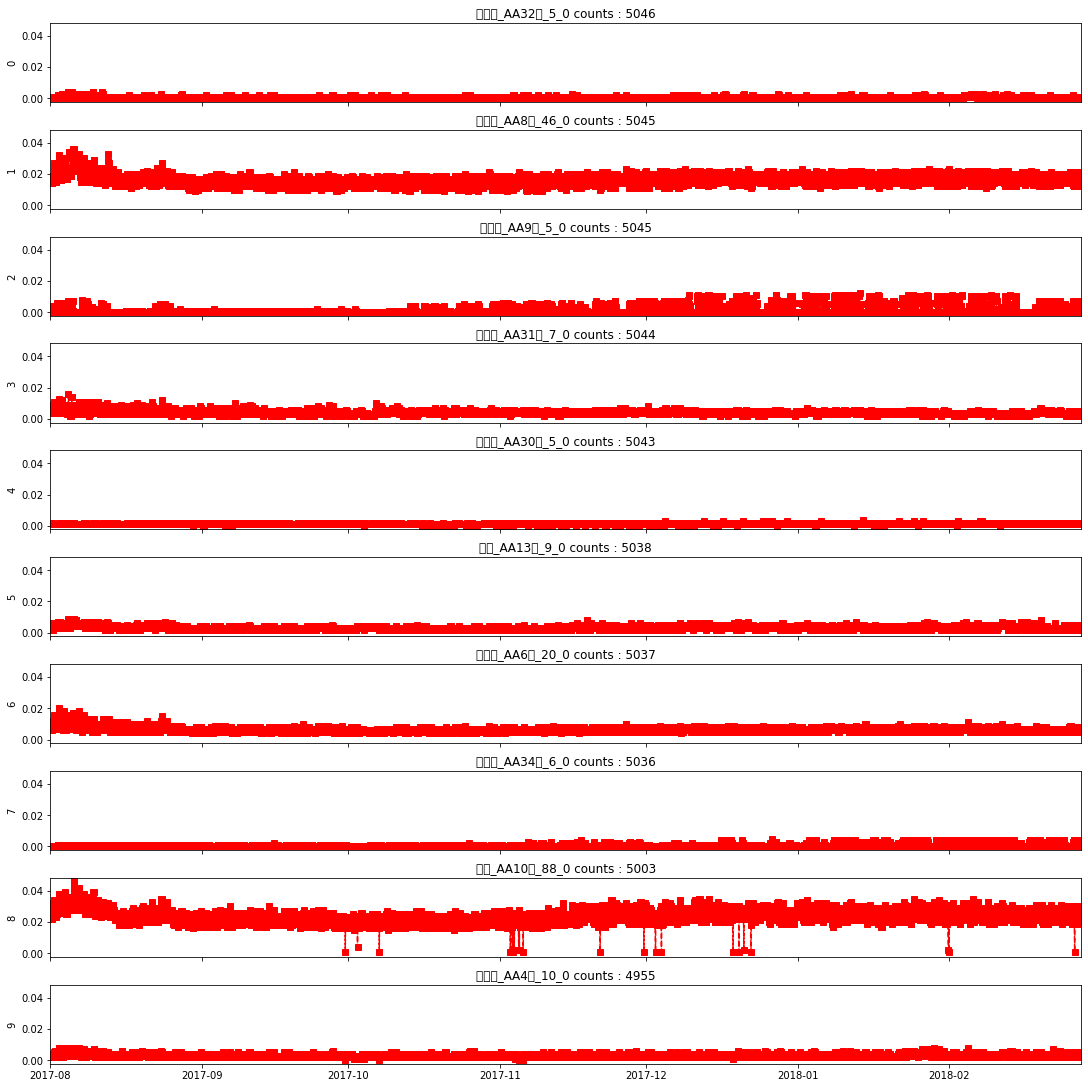

In [145]:
# step 1 : (상위 `10`개)
df_group_A_lists = df_multiple_visualize(df_group_A, 10, 15, 15, start_time = '2017-8-1', end_time = '2018-2-28')

### 일반용(갑)저압 시각화 (`contract_type = 1`)

- step 1 : 2017-8-1 ~ 2018-2-28 까지의 유효전력 시각화 (상위 `n`개)
- step 2 : 상위 10개를 csv 파일로 출력하기

/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from c

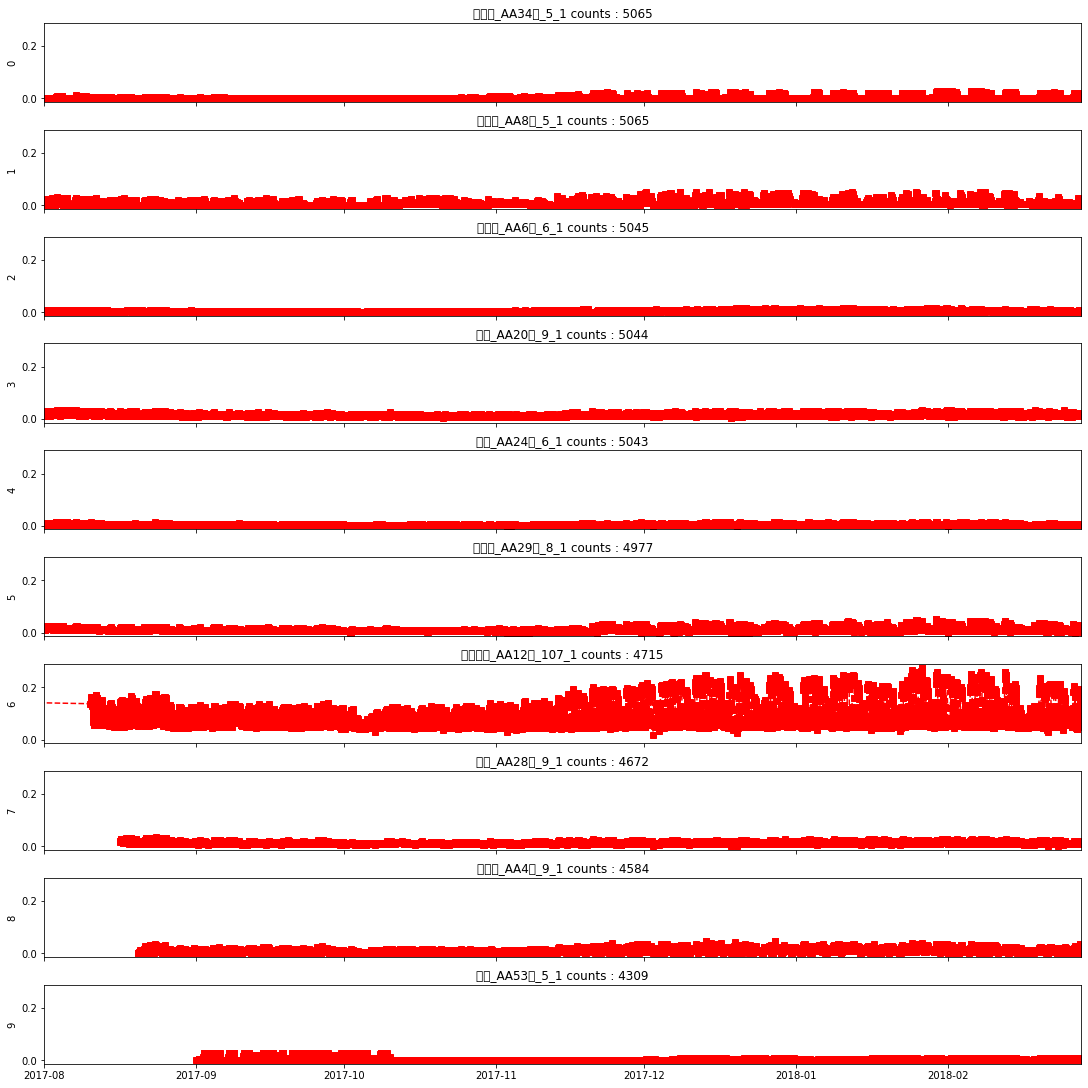

In [146]:
# 일반용(갑)저압 시각화
# step 1 : (상위 `10`개)
df_group_B_lists = df_multiple_visualize(df_group_B, 10, 15, 15, start_time = '2017-8-1', end_time = '2018-2-28')